In [1]:
import multiprocessing

cores = multiprocessing.cpu_count()
print (cores)

8


setting up parameters for Word2Vec

min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)

window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)

size = int - Dimensionality of the feature vectors. - (50, 300)

sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)

alpha = float - The initial learning rate - (0.01, 0.05)

min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00

negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)

workers = int - Use these many worker threads to train the model (=faster training with multicore machines)


In [2]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [6]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\e1077926\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\e1077926\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
from time import time
import nltk
from nltk.corpus import abc
import multiprocessing

cores = multiprocessing.cpu_count()
t = time()
sentences = abc.sents()

print(len(sentences))

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

w2v_model.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

29059
Time to build vocab: 0.06 mins


In [8]:
print(w2v_model.corpus_count)

29059


In [9]:
sentences = abc.sents()
sentences = sentences[0:1000]
print(len(sentences))
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


w2v_model.build_vocab(sentences, progress_per=10000)
print(w2v_model.corpus_count)

1000
1000


Training of the model:
Parameters of the training:

total_examples = int - Count of sentences;
epochs = int - Number of iterations (epochs) over the corpus - [10,20,30]

In [10]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.01 mins


In [11]:
X= list(w2v_model.wv.vocab)
print(X)

['of', 'AWB', 'The', 'Minister', 'has', 'he', 'was', 'to', 'Iraq', 'the', 'wheat', 'be', 'on', '.', 'from', 'and', 'have', 'been', 'by', 'into', 'oil', 'for', 'food', 'one', 'Mr', 'in', 'with', 'Government', "'", 's', 'says', ',', 'time', 'a', 'company', 'can', 'its', 'which', '$', 'million', '"', 'this', 'at', 'trade', ',"', 'said', 'But', 'about', 'do', 'not', 'It', 'would', 'if', 'as', 'I', 't', 'could', 'Australia', 'very', 'market', 'Peter', 'an', 'that', 'had', 'after', '-', 'it', 'still', 'grain', 'growers', 'New', 'South', 'say', 'they', 'get', 'prices', 'their', 'think', 'all', 'single', 'desk', 'are', 'going', 'people', 'got', 'them', 've', 'over', 'is', 'will', 'too', 'there', '."', 'back', 'year', 'price', 'years', 'export', 'farmers', 'help', 'Farmers', 'just', 'cattle', 'week', 'or', 'up', 'We', 'we', 're', 'A', 'Western', 'Victoria', 'also', 'out', 'were', 'more', 'only', 'but', 'down', 'state', 'deal', 'first', 'workers', 'off', 'new', 'industry', 'wool', 'Australian', 

In [12]:
w2v_model.wv.most_similar('help')


[('that', 0.9999266862869263),
 ('.', 0.9999246597290039),
 (',"', 0.9999233484268188),
 ('"', 0.9999231100082397),
 ('it', 0.9999216794967651),
 ('industry', 0.9999204874038696),
 ('the', 0.9999204277992249),
 ('they', 0.9999202489852905),
 ('with', 0.9999198913574219),
 ('from', 0.9999197721481323)]

In [13]:
# Vector of help
help_vec = w2v_model.wv["help"]
print(help_vec)

[ 7.94268623e-02 -1.19976118e-01 -6.11898899e-02  9.95980725e-02
 -3.90754314e-03  1.76396057e-01 -1.74683020e-01  6.23603612e-02
 -4.09190804e-02  5.04278624e-03  2.20543385e-01 -5.37517481e-02
 -6.86010495e-02  7.47306319e-03  6.94648251e-02 -9.50588882e-02
 -7.50252753e-02  2.06879107e-03  9.22547095e-03  8.32012817e-02
 -6.87487423e-02  1.21612407e-01 -5.81166707e-04  8.37032199e-02
  1.13722682e-01 -7.67787397e-02 -7.97585249e-02 -4.11391333e-02
  2.98263319e-02  5.29444963e-02  1.23041019e-01 -1.42194688e-01
 -3.68320309e-02 -4.67644669e-02 -9.28761959e-02  5.38847744e-02
 -1.47908375e-01  1.66825294e-01  1.13077141e-01  5.24140224e-02
  1.02584787e-01 -1.54396281e-01  1.88466594e-01 -3.19396518e-02
  1.25138666e-02 -8.10939670e-02 -2.13872701e-01  2.00767666e-01
  2.91220807e-02 -2.65727229e-02  4.35938388e-02 -7.57235736e-02
  7.85314664e-02 -9.43076611e-02  6.40312508e-02  1.31409213e-01
  1.64409161e-01 -5.76844551e-02 -1.85921360e-02 -5.55644892e-02
  1.06221013e-01 -8.62357

In [14]:
sentences = abc.sents()
t = time()
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.32 mins


In [15]:
w2v_model.wv.most_similar('help')



[('should', 0.9736603498458862),
 ('stop', 0.9635000228881836),
 ('support', 0.9606922268867493),
 ('allow', 0.9597729444503784),
 ('future', 0.955683171749115),
 ('changes', 0.9526770710945129),
 ('try', 0.9504908919334412),
 ('improve', 0.9498195052146912),
 ('issues', 0.9486807584762573),
 ('technology', 0.9448997378349304)]

In [16]:
# Vector of help
help_vec = w2v_model.wv["help"]
print(help_vec)

[ 1.17258847e-01  1.70875471e-02 -2.55051464e-01 -7.32806399e-02
  2.00378537e-01  1.94304585e-01 -2.11663857e-01  8.18838552e-02
 -4.85505946e-02 -1.11817777e-01  8.39879587e-02  3.08474638e-02
 -2.54369706e-01  4.02581990e-01  1.90839678e-01  1.47355884e-01
 -5.66411950e-02  2.82041252e-01 -6.36820262e-03  2.24710524e-01
 -1.61748350e-01  6.27292022e-02  5.27099594e-02 -6.07175846e-03
  8.88421908e-02  4.13789488e-02 -1.13801435e-01  1.85776398e-01
 -5.32850921e-02  1.12422854e-01  1.79588944e-01 -2.46721134e-02
  7.36064166e-02  2.52672970e-01 -1.64392039e-01 -4.24139649e-02
  4.23218161e-02  8.75027385e-03 -1.95844188e-01  1.29556999e-01
  5.51281273e-02 -1.00280464e-01  9.34888572e-02 -1.54290363e-01
 -2.16722973e-02  2.46986628e-01 -2.10695341e-01  1.01072073e-01
 -1.07278667e-01 -5.53680182e-01  7.17052221e-02 -1.67960837e-01
  1.14310645e-01 -5.32685071e-02  1.04157776e-02  1.29798993e-01
  1.11832812e-01 -1.63429976e-01 -2.40791142e-01 -1.95419684e-01
  2.23389566e-01 -1.25607

In [17]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\Users\ranadhir.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if sys.path[0] == '':
C:\Users\ranadhir.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
C:\Users\ranadhir.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


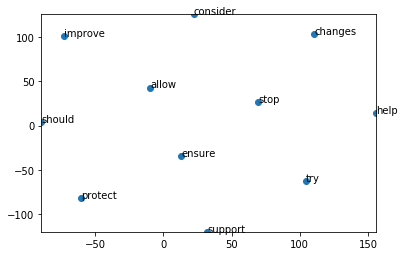

In [21]:
display_closestwords_tsnescatterplot(w2v_model, 'help')

In [18]:
# Saving the model
w2v_model.save("test_word2vec.bin")

# Loading the saved model
w2v_model = Word2Vec.load("test_word2vec.bin")